In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Cleaned_Fire_data.csv")

In [3]:
df.head()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        243 non-null    int64  
 1   day          243 non-null    int64  
 2   month        243 non-null    int64  
 3   year         243 non-null    int64  
 4   Temperature  243 non-null    int64  
 5   RH           243 non-null    int64  
 6   Ws           243 non-null    float64
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    float64
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    float64
 14  Classes      243 non-null    object 
 15  Region       243 non-null    int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 30.5+ KB


In [5]:
df.columns

Index(['index', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [6]:
df.drop(['month','day','year','index'],axis=1,inplace=True)

In [7]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [8]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
###Independent and depedent features 
X=df.drop('FWI',axis=1)
y=df['FWI']

In [12]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [14]:
### Train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [15]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [16]:
### Feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


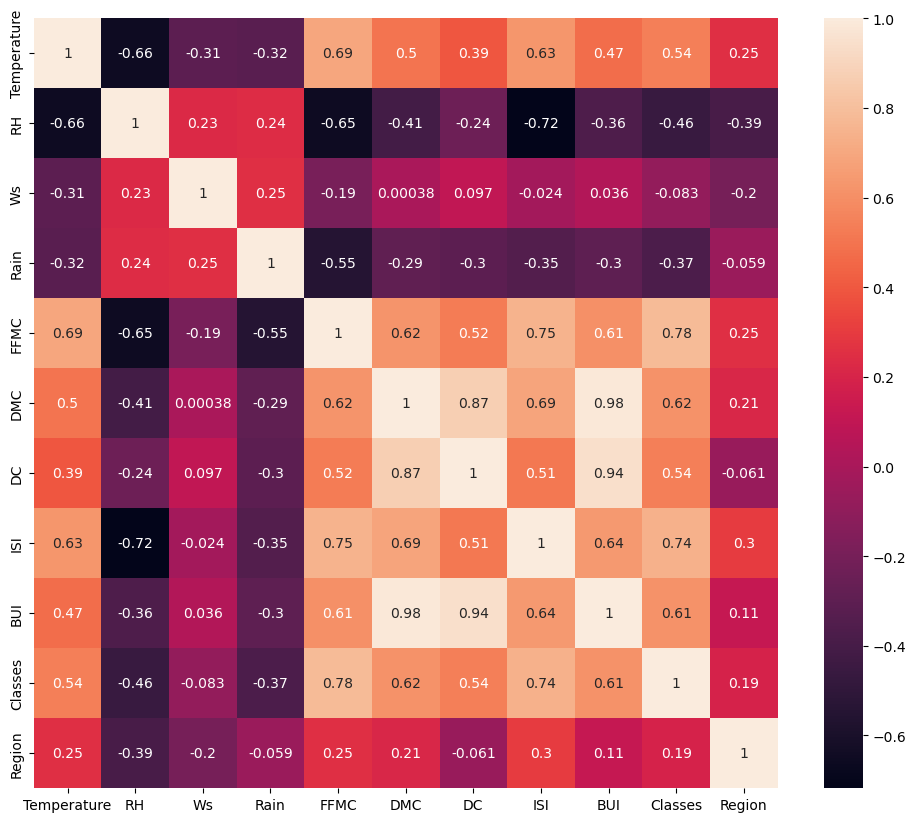

In [17]:
### Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [18]:
def corelation(dataset,threshold):
    col_corr= set()
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [19]:
## threshold -- domain expertise
corr_features = corelation(X_train,0.85)

In [20]:
## Drop features when correlation more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

### Feature scalling or standardization


In [21]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [22]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

 ### Linear Regression Model

Mean absolute error:  0.9939450225331384
R2 score:  0.9607056657860651


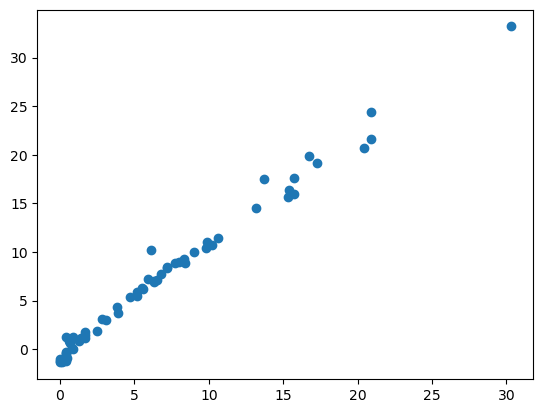

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg= LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred=linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error: ",mae)
print("R2 score: ",score) 
plt.scatter(y_test,y_pred)
plt.show()

### Lasso regression

Mean absolute error:  0.9605020166901075
R2 score:  0.9692970913627958


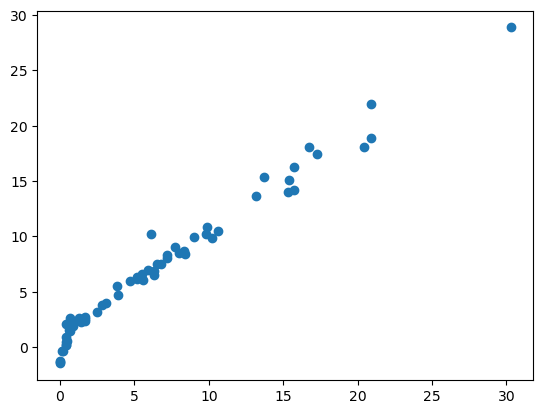

In [24]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso= Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error: ",mae)
print("R2 score: ",score) 
plt.scatter(y_test,y_pred)
plt.show()

### Cross validation Lasso

In [25]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [26]:
lassocv.predict(X_test_scaled)

array([ 8.86654967,  8.43070902, -0.90302841,  4.68098187,  7.24263344,
        1.32021928,  2.11367273,  8.21421082,  1.52734245,  3.22056904,
       -0.03995198, 10.37451129, 10.37998213, 19.03334817, 20.44720604,
        1.27831956,  1.0595027 , -1.60642915,  7.82928951,  3.04517588,
        1.69590846, -0.5307755 ,  7.08824382, -0.54402607, 24.2542425 ,
        5.38439947,  6.1122841 , 10.61847675, -1.76028475, 11.13429576,
        7.11541298, -0.99084734, 11.32786597, 15.83158382,  1.40129636,
        0.39904841,  1.773981  ,  6.21850149, -1.48167507, -1.38799102,
        6.73042232,  1.80848785,  9.14655355, -1.82642837, 17.49590209,
        9.00686547,  9.11856076,  0.88381183, 14.54700113,  0.69104367,
       32.69853037,  5.78355343, 19.75748534, 21.41628847, 15.48410921,
       17.30083201,  0.53603436, 10.05123875,  3.94212023, 16.19730883,
        5.57420484])

In [27]:
lassocv.alpha_

0.05725391318234408

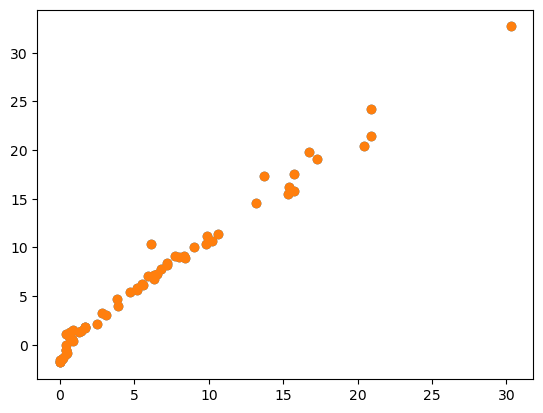

In [29]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)

plt.show()

### Ridege Regression Model

Mean absolute error:  0.9862070802884408
R2 score:  0.9616458508455313


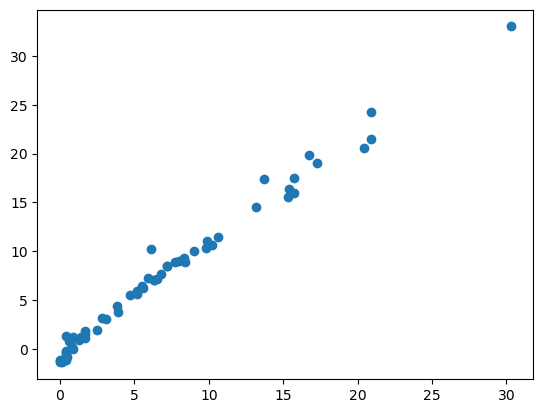

In [35]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge= Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error: ",mae)
print("R2 score: ",score) 
plt.scatter(y_test,y_pred)
plt.show()

In [33]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_test_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [61, 182]

#### Elasticnet Regression

Mean absolute error:  1.6511868133560939
R2 score:  0.9081701979826986


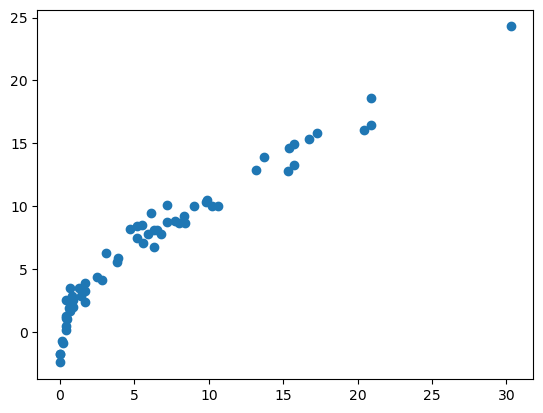

In [34]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
els= ElasticNet()
els.fit(X_train_scaled,y_train)
y_pred=els.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error: ",mae)
print("R2 score: ",score) 
plt.scatter(y_test,y_pred)
plt.show()